# Analyze existing RCT datasets
Analyze existing RCT datasets using both frequentist and Bayesian approaches. 
The data I am using comes from Blatmann's RCT on war affected youth in Uganda which I downloaded from the dataverse.

In [1]:
import pandas as pd
import numpy as np
df =pd.read_stata("/Users/douglasjohnson/Documents/coding/datasets/yop_analysis.dta")

0.0    2170
1.0    1676
Name: treated, dtype: int64

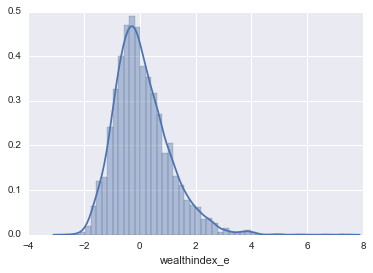

In [51]:
# inspect the data
%matplotlib inline
import seaborn as sns
sns.distplot(df.wealthindex_e)
df.treated.value_counts()

In [30]:
# estimate the unadjusted impact on wealthindex_e
df = df[-df.wealthindex_e.isnull()]
import statsmodels.api as sm
X = df.treated
X = sm.add_constant(X)
model = sm.OLS(df.wealthindex_e, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          wealthindex_e   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     19.75
Date:                Mon, 09 May 2016   Prob (F-statistic):           9.07e-06
Time:                        13:18:08   Log-Likelihood:                -5403.2
No. Observations:                3846   AIC:                         1.081e+04
Df Residuals:                    3844   BIC:                         1.082e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0154      0.021      0.725      0.4

In [47]:
# attempt to do basically the same analysis using a Bayesian approach and PyMC3
from pymc3 import Model, Normal, HalfNormal, NUTS, sample, find_MAP
from scipy import optimize
with Model() as basic_model:
    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10)
    sigma = HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta*df.treated

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=df.wealthindex_e)
    # obtain starting values via MAP
    start = find_MAP(fmin=optimize.fmin_powell)

    # draw 2000 posterior samples
    trace = sample(2000, start=start) 

Applied log-transform to sigma and added transformed sigma_log to model.
Assigned NUTS to alpha
Assigned NUTS to beta
Assigned NUTS to sigma_log
 [-----------------100%-----------------] 2000 of 2000 complete in 1.9 sec

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12491ba90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12807c3c8>]], dtype=object)

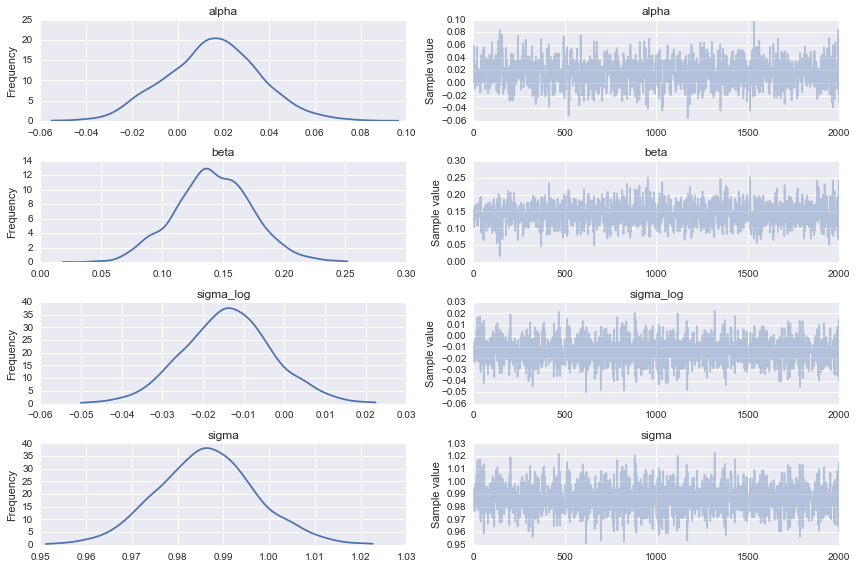

In [48]:
from pymc3 import traceplot
traceplot(trace)

In [53]:
from pymc3 import summary
summary(trace)


alpha:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.016            0.020            0.001            [-0.025, 0.054]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.024         0.002          0.016          0.029          0.056


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.142            0.032            0.001            [0.075, 0.199]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.080          0.122          0.141          0.163          0.205


sigma_log:

  Mean             SD               MC Error         95% HPD interval
  ---------------------

In [57]:
help("pymc3")

Help on package pymc3:

NAME
    pymc3

PACKAGE CONTENTS
    backends (package)
    blocking
    core
    data
    debug
    diagnostics
    distributions (package)
    examples (package)
    glm (package)
    interactive_sampling
    math
    memoize
    model
    plots
    progressbar
    sampling
    stats
    step_methods (package)
    tests (package)
    theanof
    tuning (package)
    variational (package)
    vartypes

SUBMODULES
    arraystep
    compound
    continuous
    discrete
    dist_math
    distribution
    gibbs
    hmc
    metropolis
    multivariate
    nuts
    quadpotential
    scaling
    slicer
    special
    starting
    timeseries
    transforms

DATA
    StudentTpos = <pymc3.distributions.continuous.Bound object>
    abs_ = <theano.tensor.elemwise.Elemwise object>
    and_ = <theano.tensor.elemwise.Elemwise object>
    bool_types = {'int8'}
    ceil = <theano.tensor.elemwise.Elemwise object>
    clip = <theano.tensor.elemwise.Elemwise object>
    complex_t